In [25]:
from neuron import h, load_mechanisms
from netpyne import specs, sim
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy.random import default_rng

In [26]:
h.load_file("stdrun.hoc")

cwd = os.getcwd()
mod_dir = '/Users/katedoxey/Desktop/research/projects/tinnitus model/code/DCN_model/mod'
load_mechanisms(mod_dir)

Mechanisms already loaded from path: /Users/katedoxey/Desktop/research/projects/tinnitus model/code/DCN_model/mod.  Aborting.


True

In [27]:
n_cells = 50

cell_types = ['P']  #['P', 'I2', 'W', 'AN']
record_cells = [(f'{cell_type}_pop', n_cells) for cell_type in cell_types]

dt = 0.01

cfg = specs.SimConfig()	
cfg.duration = 1200				                 
cfg.dt = dt								                # Internal integration timestep to use
cfg.verbose = True							                # Show detailed messages
cfg.recordCells = ['all']
cfg.recordTraces = {'V_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'v'}}
cfg.recordStep = dt
# cfg.recordStim = True
# cfg.filename = os.path.join(sim_dir, f'{sim_label}-DCN') 	# Set file output name
cfg.savePickle = False
# cfg.analysis['plotTraces'] = {'include': ['all'], 'saveFig': False, 'showFig': False}  # Plot recorded traces for this list of cells
# cfg.analysis['recordTraces'] = 
# cfg.analysis['plotSpikeFreq'] = {'include': ['all'], 'saveFig': True, 'showFig': True}
cfg.hParams['celsius'] = 34.0 
cfg.hParams['v_init'] = -60

In [28]:
netParams = specs.NetParams()

IzhCell = {'secs': {}}
IzhCell['secs']['soma'] = {'geom': {}, 'pointps': {}}                        # soma params dict
IzhCell['secs']['soma']['geom'] = {'diam': 50, 'L': 50, 'cm': 1}    # soma geometry, cm = 31.831
IzhCell['secs']['soma']['pointps']['Izhi'] = {                               # soma Izhikevich properties
    'mod':'Izhi2007b',
    'C':1,
    'k': 0.7,
    'vr':-60,
    'vt':-40,
    'vpeak':35,
    'a':0.03,
    'b':-2,
    'c':-50,
    'd':100,
    'celltype':1}
# IzhCell['secs']['soma']['threshold'] = -20
netParams.cellParams['IzhCell'] = IzhCell 


In [29]:
pop_labels_nums = {cell_type: n_cells for cell_type in cell_types}

for pop_label, pop_num in pop_labels_nums.items():
    netParams.popParams[f'{pop_label}_pop'] = {'cellType': 'IzhCell',
                                                'numCells': pop_num}

In [30]:
e_tau = 0.2
netParams.synMechParams['exc'] = {'mod': 'ExpSyn', 'tau': e_tau, 'e': 10}
netParams.synMechParams['inh'] = {'mod': 'ExpSyn', 'tau': 10, 'e': -70}


In [31]:
rng = default_rng()

rand_is = rng.choice(n_cells, size=n_cells, replace=False)
if n_cells == 1:
    anf_freqs = [40]
else:
    anf_freqs = [0 for i in range(n_cells)]

for j, rand_i in enumerate(rand_is):

    if j < n_cells//2:
        anf_freqs[rand_i] = 0
    else:
        anf_freqs[rand_i] = np.random.uniform(40, 80)



In [32]:
stim_delay = 100
stim_dur = 1000

syn_weight = 0.2

for i, anf_freq in enumerate(anf_freqs):

    netParams.popParams[f'vecstim_ANF{i}'] = {
        'cellModel': 'VecStim',
        'numCells': 1,  # int(len(syn_secs)/4),
        'spikePattern': {'type': 'poisson',
                        'start': stim_delay,
                        'stop': stim_dur+stim_delay,
                        'frequency': np.floor(anf_freq)}  #  np.random.randint(params.spk_freq_lb, params.spk_freq_ub, 1)[0]}
    }

    netParams.connParams[f'vecstim_AFN{i}->P'] = {
        'preConds': {'pop': f'vecstim_ANF{i}'},
        'postConds': {'pop': 'P_pop'},
        'sec': 'soma',
        'synsPerConn': 1,
        'synMech': 'exc',
        'weight': syn_weight,  # 
        # 'synMechWeightFactor': [0.5,0.5],
        'delay': 'defaultDelay + dist_2D/propVelocity',
        'connList': [[0,i]]
    }

In [33]:
# netParams.stimSourceParams['IClamp_0'] = {'type': 'IClamp', 'del': stim_delay, 'dur': stim_dur, 'amp': 0.2}
# netParams.stimTargetParams['IClamp_0->P'] = {'source': 'IClamp_0', 'sec': 'soma', 'loc': 0.5, 'conds': {'pop': 'P_pop', 'cellList': [0]}}


In [34]:
(pops, cells, conns, stims, simData) = sim.createSimulateAnalyze(netParams=netParams, simConfig=cfg, output=True)


Start time:  2025-02-03 16:05:13.370242

Creating network of 51 cell populations on 1 hosts...
Distributed population of 50 cells on 1 hosts: {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}, next: 0
Cell 0/49 (gid=0) of pop P_pop, on node 0, 
Cell 1/49 (gid=1) of pop P_pop, on node 0, 
Cell 2/49 (gid=2) of pop P_pop, on node 0, 
Cell 3/49 (gid=3) of pop P_pop, on node 0, 
Cell 4/49 (gid=4) of pop P_pop, on node 0, 
Cell 5/49 (gid=5) of pop P_pop, on node 0, 
Cell 6/49 (gid=6) of pop P_pop, on node 0, 
Cell 7/49 (gid=7) of pop P_pop, on node 0, 
Cell 8/49 (gid=8) of pop P_pop, on node 0, 
Cell 9/49 (gid=9) of pop P_pop, on node 0, 
Cell 10/49 (gid=10) of pop P_pop, on node 0, 
Cell 11/49 (gid=11) of pop P_pop, on node 0, 
Cell 12/49 (gid=12) of pop P_pop, on node 0, 
Cell 13/49 (gid=13) of pop P_pop, on node 0, 
Cell 14/49 (gid=14) of pop P

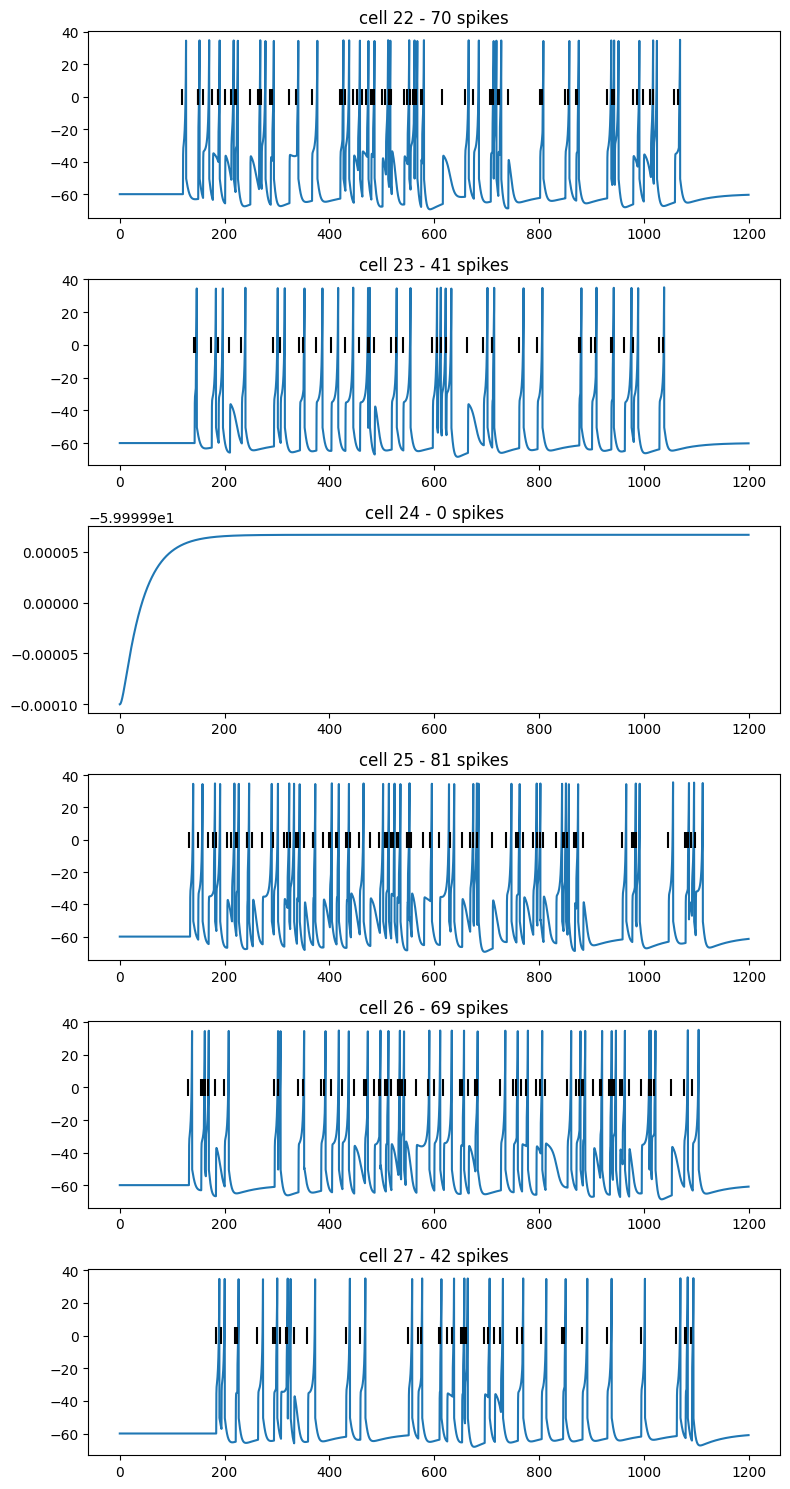

In [43]:
temp = 4

middle_cells = [i for i in range(n_cells//2 - 3, n_cells//2 + 3) ]

fig, axs = plt.subplots(len(middle_cells), 1, figsize=(8,15))
axs.ravel()

t = np.array(simData['t'])
spkt = np.array(simData['spkt'])
spkid = np.array(simData['spkid'])


for i, middle_cell in enumerate(middle_cells):

    v_soma = np.array(simData['V_soma'][f'cell_{middle_cell}'])
    
    poisson_train = spkt[np.where(spkid == middle_cell+n_cells)]

    axs[i].plot(t, v_soma)
    axs[i].vlines(poisson_train, ymin=-5, ymax=5, color='k')
    axs[i].set_title(f'cell {middle_cell} - {len(poisson_train)} spikes')

fig.tight_layout()

plot sim data - cell spiking (middle and one of each side)
plot spike trains of ANF (correspond to cell ^)